# LASI21 Machine Learning Workshop

## KMeans Clustering

In [97]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

sns.set_style("whitegrid")

# Load and Review Dataset

The dataset represents mall shoppers. Using data mining we want to identify patterns and then target customer strategy accordingly.

In [73]:
df = pd.read_csv("data/mallcustomers.csv")

Although there are four columns, we will only use Income and Score for clustering. Income is personal income. Score is an index of the amount the customer spends.

In [74]:
df.head()

,Gender,Age,Income,Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [75]:
df.describe()

,Age,Income,Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


<AxesSubplot:xlabel='Income', ylabel='Score'>

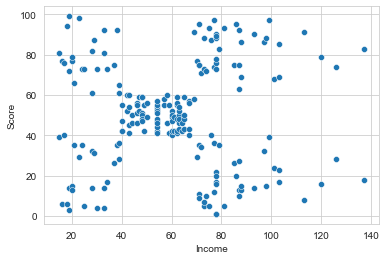

In [98]:
sns.scatterplot(x="Income",y="Score",data=df)

## KMeans Clustering

In [99]:
# X will be a subset of the data
X = df[['Score','Income']]

In [100]:
# We are asking the algorithm to identify 5 clusters or groups
km = KMeans(n_clusters=5).fit(X)

In [101]:
# retrieve the results in the form of an array
results = km.predict(X)

In [102]:
# look at sample results
results[0:50]

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 2,
       3, 0, 2, 2, 2, 2], dtype=int32)

In [103]:
# create a dataframe for the clusters
clusters = pd.DataFrame(results,columns=['cluster'])

In [104]:
# create a new dataframe which joins the cluster to X
df_c = X.join(clusters, how='outer')

In [105]:
df_c.head()

,Score,Income,cluster
0,39,15,3
1,81,15,0
2,6,16,3
3,77,16,0
4,40,17,3


<AxesSubplot:xlabel='Income', ylabel='Score'>

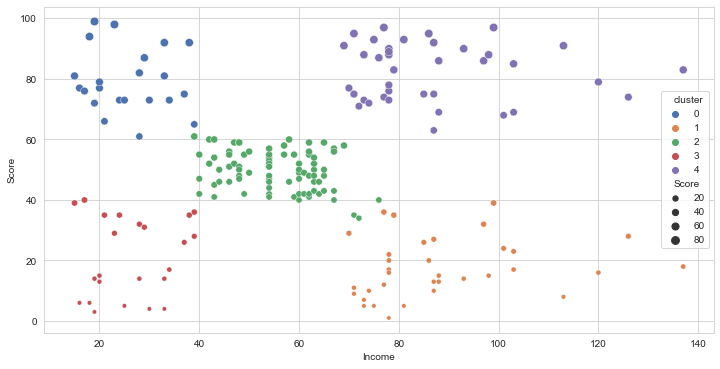

In [106]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="Income",y="Score",data=df_c,hue="cluster",
                palette="deep",size="Score")

In [111]:
category = {0:'Enthusiastic', 1:'Conservative', 
            2:'Middle-of-the-Road', 3:'Browsers',4:'Luxury'}

In [112]:
df_c['cat'] = df_c['cluster']

In [113]:
df_c = df_c.replace({'cat':category})

<AxesSubplot:xlabel='Income', ylabel='Score'>

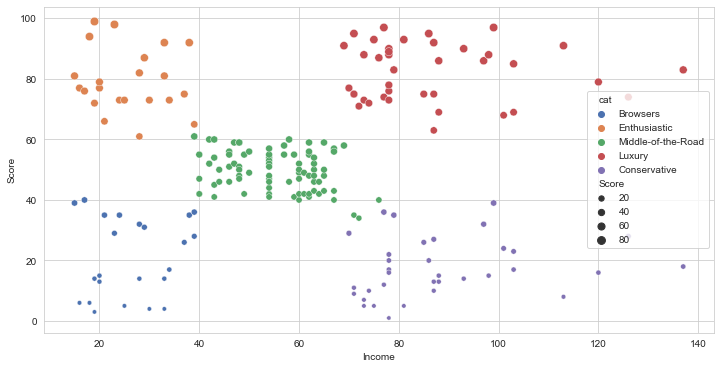

In [114]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="Income",y="Score",data=df_c,hue="cat",
                palette="deep",size="Score")

## Marketing Campaign based on Clusters

- **Browsers**: low income, low spend
- **Enthusiastic**: low income, high spend
- **Middle-of-the-road**: moderate income, moderate spend
- **Conservative**: high income, low spend
- **Luxury**: high income, high spend

Based on the initial grouping we might set some initial goals and strategy. The first aspect of the strategy is to retain existing customers. 

**High Spend**

Two clusters have a high spend. One has low income and the other high income. The retain strategy for both might be based on improved service, but formulated differently. After discussion with the business units the hypothesis is that enthusiastic shoppers come to the mall because they find good bargains. Enhanced service for the group might be better communication on upcoming bargains and a feedback cycle getting what new goods and services will enhance their shopping experience. For the luxury group a concierge service is suggested, such as free valet parking.  

**Growth Strategy**

The growth strategy might be directed to two groups. Among the conservative group identify a subset which have most of the characteristics of the luxury group. Nudge a subset towards the luxury group. Among the middle-of-road identify a subset that have characteristics of the enthusiastic group. Nudge them towards bargain
